In [9]:
from PIL import Image
import numpy as np

# Load image
img = Image.open("pexels-pic.jpg") 
img_array = np.array(img)

In [10]:
img_array.shape

(3819, 5721, 3)

In [11]:
#pick 2000, 2000
img_array[:10,:10]

array([[[161, 161, 161],
        [163, 163, 163],
        [164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        [165, 165, 165],
        [167, 167, 167],
        [166, 166, 166],
        [167, 167, 167]],

       [[161, 161, 161],
        [163, 163, 163],
        [164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        [165, 165, 165],
        [167, 167, 167],
        [164, 164, 164],
        [165, 165, 165]],

       [[161, 161, 161],
        [163, 163, 163],
        [164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        [165, 165, 165],
        [167, 167, 167],
        [163, 163, 163],
        [163, 163, 163]],

       [[161, 161, 161],
        [163, 163, 163],
        [164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        [165, 165, 165],
        [167, 167, 167],
        [163, 163, 163],
        [163, 163, 

1. Convert this image into grayscale

In [13]:
img_gray = np.mean(img_array, axis=2)

In [15]:
img_gray.shape

(3819, 5721)

In [16]:
from matplotlib import pyplot as plt

In [21]:
def imshow(img):
    plt.imshow(img, cmap='gray')

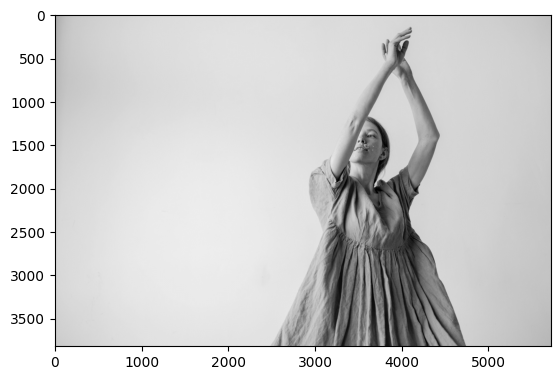

In [22]:
imshow(img_gray)

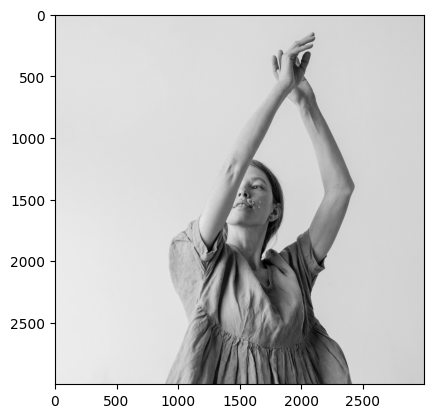

In [23]:
img = img_gray[:3000, 2000:5000]
imshow(img)

In [24]:
img.shape

(3000, 3000)

Q: Make this pic dirty. add some noise to it

Q: Resize to 50% width and 50% height

Approach:
    1. pick grid[0][0]
    2. Sum/Mean of consecutive pixels
    3. Max of 2x2 numbers
    4. Do the above with different size of windows such as 3x3 (or 4x4 ..) with skipping of 2x2




In [42]:
def pick_lt(img):
    w, h = img.shape
    sm_img = np.zeros((w//2+1, h//2 + 1))

    for i in range(0, w, 2):
        for j in range(0, h, 2):
            sm_img[i//2][j//2] = img[i][j]
    return sm_img

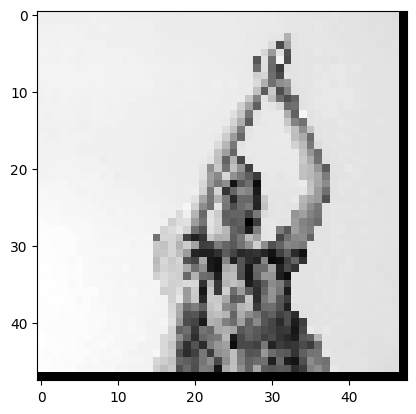

In [43]:
sm_img = pick_lt(pick_lt(pick_lt(pick_lt(pick_lt(pick_lt(img))))))
imshow(sm_img)

In [44]:
def pick_lt(img):
    w, h = img.shape
    sm_img = np.zeros((w//2, h//2))
    ww, hh = sm_img.shape
    for i in range(0, ww):
        for j in range(0, hh):
            ii = i*2
            jj = 2*j
            sm_img[i][j] = np.sum(img[ii:ii+2, jj:jj + 2])/4
    return sm_img

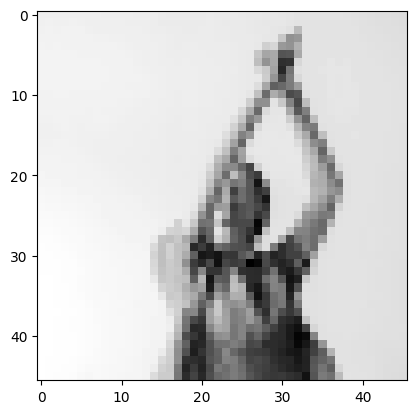

In [45]:
sm_img = pick_lt(pick_lt(pick_lt(pick_lt(pick_lt(pick_lt(img))))))
imshow(sm_img)

In [ ]:
1. Mean, Left Top and many other approaches can be done well with convolution.

In [ ]:
# Q: Let's come up with ideas to convert a 1500x1500 into 3000x3000
- copy 1 -> 4 pixels
- smoothening -> copy & move by 1 
- Lerp 

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255 # 
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

print (images.shape)


(2, 427, 640, 3)


In [53]:
images.shape

(2, 427, 640, 3)

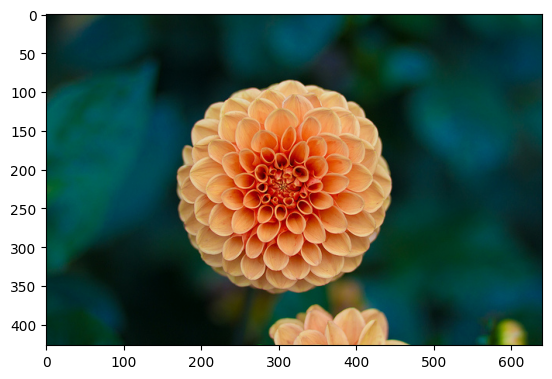

In [50]:
imshow(flower)

In [59]:
images.shape

(2, 427, 640, 3)

In [81]:
filters = np.zeros(shape=(10, 10, channels, 2), dtype=np.float32)
# filters[:, 3, :, 0] = 1  # vertical line
# filters[3, :, :, 1] = 1  # horizontal line
filters[:, :, :, 0] = 1
filters[0, 0, :, 1] = 1

filters[:, :, :, 1]

array([[[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
  

In [82]:

outputs = tf.nn.conv2d(images, filters, strides=5, padding="SAME")
print(outputs.shape)



(2, 86, 128, 2)


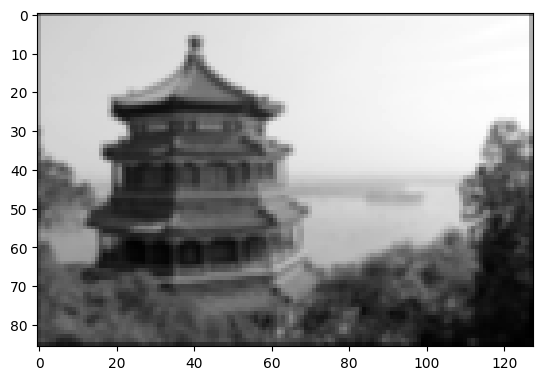

In [83]:
imshow(outputs[0, :, :, 0]) # plot 1st image's 2nd feature map
# imshow(outputs[1, :, :, 1]) # plot 1st image's 2nd feature map
# plt.axis("off") # Not shown in the book
# plt.show()

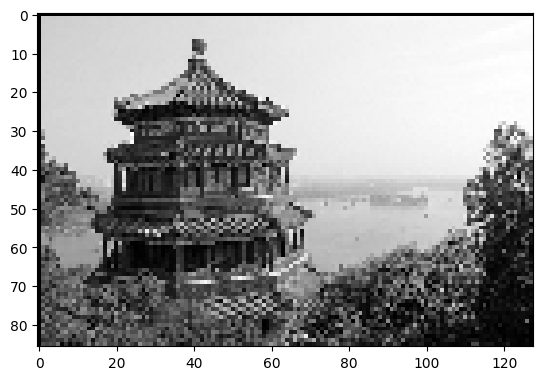

In [84]:
imshow(outputs[0, :, :, 1])

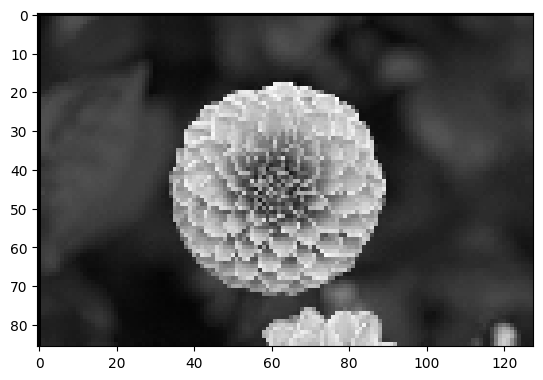

In [79]:
imshow(outputs[1, :, :, 1])

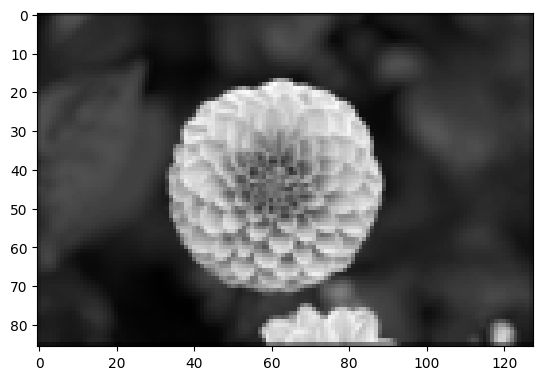

In [80]:
imshow(outputs[1, :, :, 0])